In [1]:
import os
import numpy as np
import pandas as pd
import pydicom as dicom
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
color_dict = {'non-tumor': 'turquoise',
               'adenocarcinoma': 'sienna',
               'hematopoietic ': 'springgreen',
               'squamous cell carcinoma ': 'gold',
               'melanoma': 'deeppink',
               'neuroendocrine carcinoma ': 'deeppink',
               'sarcoma ': 'darkorange',
               'urothelial carcinoma ': 'red',
               }

excel_path = 'Mets_morphology_dataset_fin_V2.xlsx'
excel = pd.read_excel(excel_path)
excel['Histomorphology'] = excel['Histomorphology'].replace('Adenokarzinom', 'adenocarcinoma')
excel['number'] = excel['number'].astype('str')

patient_class = {excel['number'][i]:excel['Histomorphology'][i]  for i in range(len(excel))}

# plot class histogram

<Axes: >

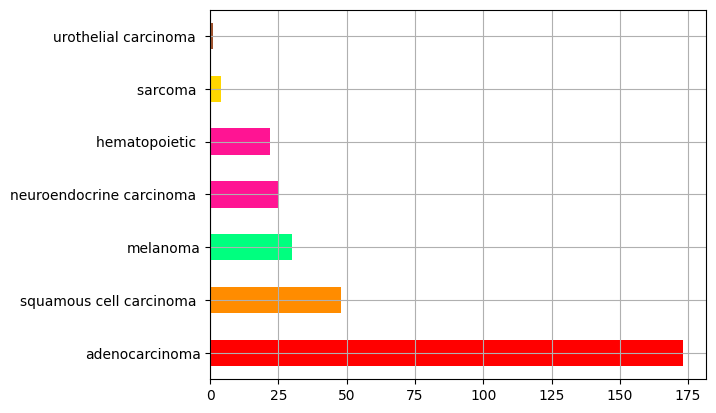

In [4]:
df_counts = excel.Histomorphology.value_counts().sort_values()
c = [color_dict[a] for a in df_counts.index]
excel.Histomorphology.value_counts().plot(kind='barh', grid=True, color=c)

# plot patients histogram

In [6]:
root = 'Channel Images'
patients = []
for image_dir, _, files in os.walk(root):
    for image_name in files:
        patients.append(image_dir.split('\\')[1])

df = pd.DataFrame(patients, columns=['patients'])


In [7]:

df_counts = df.patients.value_counts().sort_values()
colors = [color_dict[patient_class[a]] for a in df_counts.index]
bar_class_name = [patient_class[a] for a in df_counts.index]
ax = df.patients.value_counts().plot(kind='bar', grid=True, color=colors, figsize=(200,30))

for rect, label in zip(ax.patches, bar_class_name):
    height = rect.get_height()/2
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, rotation=90,
            ha='left', va='bottom')
            
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()